<a href="https://colab.research.google.com/github/ebaranas/colab/blob/master/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import random
import math
from matplotlib import pyplot as plt
a = [[-1,3],[1,2],[0,0]]
b = np.transpose(a)

np.matmul(b,a)

array([[ 2, -1],
       [-1, 13]])

In [0]:
pi = math.pi

def OLS(A, At, data):
  # returns parameters given design matrix and data
  AtA = np.matmul(At, A)
  AtA_inv = np.linalg.inv(AtA)
  aout = np.matmul(At, data)
  return np.matmul(AtA_inv, aout)

def RLS(A, At, data):
  # returns parameters given design matrix and data
  AAt = np.matmul(A, At)
  AAt_inv = np.linalg.inv(AAt)
  aout = np.matmul(AAt_inv, data)
  return np.matmul(At, aout)


def plot_model(N, M):
  # N is number of data
  # M is complexity
  
  # generate data
  t = np.linspace(.1, .9, N)
  data = [np.sin(2*pi*x) + np.random.normal(np.sin(2*pi*x), 0.5) for x in t]
  
  # generate features
  features = [t**i for i in range(0, N)]
  
  # create design matrix
  A = np.transpose(features)
  At = np.asarray(features)
  
  params = OLS(A, At, data)
  def model(x):
    return sum([params[index]*x**index for index in range(M)])

  tprime = np.linspace(.1, .9)
  output = [np.sin(2*math.pi*x) + np.random.normal(np.sin(2*math.pi*x), 0.5) for x in t]
  target = [model(x) for x in tprime]

  plt.scatter(t, output)
  plt.plot(tprime, target)

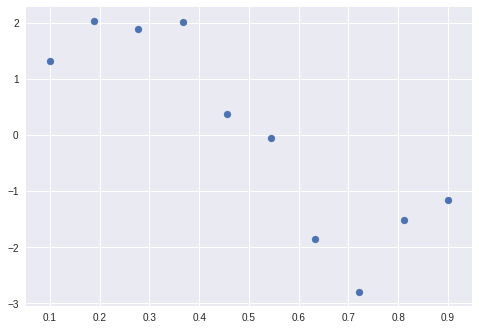

In [105]:

num_data = 10
t = np.linspace(.1, .9, num_data)
output = [np.sin(2*math.pi*x) + np.random.normal(np.sin(2*math.pi*x), 0.5) for x in t]

In [0]:
complexity = 3
features = [t**i for i in range(0, complexity)]

In [141]:
A = np.transpose(features)
At = np.asarray(features)
print(At.shape)
A

(3, 10)


array([[1.        , 0.1       , 0.01      ],
       [1.        , 0.18888889, 0.03567901],
       [1.        , 0.27777778, 0.07716049],
       [1.        , 0.36666667, 0.13444444],
       [1.        , 0.45555556, 0.20753086],
       [1.        , 0.54444444, 0.29641975],
       [1.        , 0.63333333, 0.40111111],
       [1.        , 0.72222222, 0.52160494],
       [1.        , 0.81111111, 0.65790123],
       [1.        , 0.9       , 0.81      ]])

In [0]:
# Given n x m design matrix A
AAt = np.matmul(A, At)
AAt_inv = np.linalg.inv(AAt) # n x n - singular if num_data < features

In [143]:
AtA = np.matmul(At, A)
print(AtA.shape)
AtA_inv = np.linalg.inv(AtA) # m x m
print(AtA_inv.shape)

(3, 3)
(3, 3)


In [144]:
# solve for parameters coefficients OLS
aout = np.matmul(At, output)
params = np.matmul(AtA_inv, aout)
params

array([ 1.7061178 , -2.24195417, -2.07790424])

In [145]:
# solve for parameters coefficients RLS
aout = np.matmul(AAt_inv, output)
params_reg = np.matmul(At, aout)
def model(x):
  return sum([params[index]*x**index for index in range(complexity)])
params_reg

array([ -1.,  18., -29.])

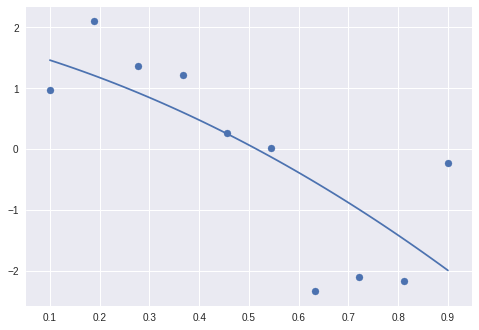

In [149]:
num_data = 10
t = np.linspace(.1, .9, num_data)
tprime = np.linspace(.1, .9)
output = [np.sin(2*math.pi*x) + np.random.normal(np.sin(2*math.pi*x), 0.5) for x in t]
target = [model(x) for x in tprime]

plt.scatter(t, output)
plt.plot(tprime, target)